# Tarea 1- Unidad 2 **Reinterpretación de la base de datos obtenida en el primer Análisis de peligrosidad de los ciclones tropicales en México.** 🌩



*   Benítez López Lidia Yoletzi

> Usando el archivo de salida final obtenido en: Interpretación de base de datos: Análisis de peligrosidad se los ciclones tropicales en México. Evaluación con el Sistema de Alerta Temprana para Ciclones Tropicales (SIAT-CT), generar mapas para conocer la trayectoria del ciclón Alex y su cercanía a los estados durante dicha trayectoria.

---
# Mapas
*  Mapa 1:  La trayectoria de Alex de acuerdo a la escala de peligrosidad.
   *  Visualización del archivo de salida
   *  Visualización de las coordenas
   *  Visualización del Mapa 1
*  Mapa 2:  La trayectoria de Alex a escala de circulación mayor o igual a 2.
   *  Visualización del Mapa 2
*  Mapa 3:  Un ciclón de intensidad alta y su cercanía a los estados.
   *   Visualización de los estados y sus coordenadas
   *   Visualización del Mapa 3

In [ ]:
!pip install mapclassify     #bibliotecas de confianza ;)
import mapclassify
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import Point, LineString, Polygon

In [ ]:
#Apertura de base de datos
from google.colab import files
archivo = files.upload()

Saving alex_clasific_seleccionado.csv to alex_clasific_seleccionado (2).csv




*   Visualización del archivo de salida



In [ ]:
df = pd.read_csv('alex_clasific_seleccionado.csv')  #los datos del .csv
df

datetime   lat    lon     mws  cpsl     r34     r5      rne  \
0   24/06/2010 18:00  15.9  -82.0   46.25  1007 -9999.0  639.5   805.22   
1   25/06/2010 00:00  16.0  -82.1   46.25  1006 -9999.0  640.5  1105.73   
2   25/06/2010 06:00  16.1  -82.3   46.25  1006 -9999.0  641.0   732.55   
3   25/06/2010 12:00  16.2  -82.5   55.50  1005 -9999.0  683.5   766.59   
4   25/06/2010 18:00  16.4  -83.1   55.50  1005 -9999.0  685.0   791.56   
5   26/06/2010 00:00  16.6  -83.9   55.50  1004 -9999.0  686.5   915.64   
6   26/06/2010 06:00  16.7  -84.9   74.00  1004    84.0  742.0   870.62   
7   26/06/2010 12:00  16.9  -86.1   74.00  1004    84.5  743.5   837.12   
8   26/06/2010 18:00  17.2  -87.2  101.70   996   154.0  785.5   818.72   
9   27/06/2010 00:00  17.5  -88.2  101.70   995   154.5  788.0   828.32   
10  27/06/2010 06:00  18.0  -89.1  101.70   991   156.5  792.0   766.27   
11  27/06/2010 12:00  18.5  -90.0   83.25   992   114.5  773.5   647.88   
12  27/06/2010 18:00  18.9  -90.7   64.75   993    55.5  734.0   553.98   
13  28/06/2010 00:00  19.2  -91.1   74.00   991    89.0  760.5   728.71   
14  28/06/2010 06:00  19.5  -91.4   74.00   991    89.5  763.0   901.69   
15  28/06/2010 12:00  20.0  -91.6   92.50   989   142.5  798.0   724.99   
16  28/06/2010 18:00  20.3  -91.7   92.50   990   143.5  800.5   815.28   
17  29/06/2010 00:00  20.7  -91.7  101.70   987   165.0  813.0   873.91   
18  29/06/2010 06:00  21.5  -91.9  101.70   985   167.5  819.0   827.63   
19  29/06/2010 12:00  22.4  -92.7  111.00   983   188.0  832.5   684.24   
20  29/06/2010 18:00  22.9  -93.6  111.00   981   190.0  836.5   849.51   
21  30/06/2010 00:00  23.0  -94.4  120.20   973   205.0  841.0   950.06   
22  30/06/2010 06:00  23.1  -94.8  129.50   966   218.0  843.0   921.03   
23  30/06/2010 12:00  23.5  -95.2  138.70   958   230.5  845.5   855.36   
24  30/06/2010 15:00  24.0  -95.5  138.70   958   232.5  850.0   885.06   
25  30/06/2010 18:00  24.3  -96.2  148.00   962   242.5  849.5   886.77   
26  01/07/2010 00:00  24.3  -97.3  166.50   948   255.5  840.0   673.35   
27  01/07/2010 02:00  24.2  -97.7  175.70   946   259.5  832.0   740.93   
28  01/07/2010 06:00  24.1  -98.4  138.70   963   232.5  850.5   774.65   
29  01/07/2010 12:00  23.5  -99.5  111.00   977   192.0  841.5   862.50   
30  01/07/2010 18:00  23.1 -100.7   74.00   987    97.5  789.5   750.84   
31  02/07/2010 00:00  23.2 -101.9   55.50   997 -9999.0  732.5   656.97   

        rnw      rsw      rse      rp  Intensidad  Circulación  Peligrosidad  \
0    983.47   521.18   725.81   758.9           0            5             2   
1   1319.65   594.94  1313.03  1083.3           0            5             2   
2    888.67   762.36   685.23   767.2           0            5             2   
3    773.32   869.44   698.78   777.0           0            5             2   
4   1175.57   696.02  1187.78   962.7           0            5             2   
5   1173.62   787.36  1155.50  1008.0           0            5             2   
6    782.71   874.05   788.46   829.0           1            1             1   
7    775.85  1065.62   848.04   881.7           1            1             1   
8    883.76  1005.71   955.63   916.0           3            3             3   
9   1035.44  1046.97   949.56   965.1           3            3             3   
10   877.16   948.72   827.45   854.9           3            3             3   
11   867.29   974.15   818.29   826.9           2            2             2   
12   971.12   978.59   787.49   822.8           1            1             1   
13   855.62   887.98   798.99   817.8           1            1             1   
14   972.79  1027.70   802.09   926.1           1            1             1   
15  1230.52   891.38   943.02   947.5           2            2             2   
16  1050.09   876.21   878.16   904.9           2            2             2   
17   963.85   974.30   904.21   929.1           3            3             3   
18  1029.20  118

In [ ]:
from shapely import Point, LineString, Polygon    #paso a paso
trayectoria= Point(df.lon[0], df.lat[0])  #coordenadas
trayectoria.geom_type

'Point'

*  Visualización de las coordenas

In [ ]:
df['geometry'] = df.apply(lambda row: Point((row.lon, row.lat)), axis=1)   #lamda para funcion corta no almacenada row/fila y para tener en cuenta las coordenadas
df

datetime   lat    lon     mws  cpsl     r34     r5      rne  \
0   24/06/2010 18:00  15.9  -82.0   46.25  1007 -9999.0  639.5   805.22   
1   25/06/2010 00:00  16.0  -82.1   46.25  1006 -9999.0  640.5  1105.73   
2   25/06/2010 06:00  16.1  -82.3   46.25  1006 -9999.0  641.0   732.55   
3   25/06/2010 12:00  16.2  -82.5   55.50  1005 -9999.0  683.5   766.59   
4   25/06/2010 18:00  16.4  -83.1   55.50  1005 -9999.0  685.0   791.56   
5   26/06/2010 00:00  16.6  -83.9   55.50  1004 -9999.0  686.5   915.64   
6   26/06/2010 06:00  16.7  -84.9   74.00  1004    84.0  742.0   870.62   
7   26/06/2010 12:00  16.9  -86.1   74.00  1004    84.5  743.5   837.12   
8   26/06/2010 18:00  17.2  -87.2  101.70   996   154.0  785.5   818.72   
9   27/06/2010 00:00  17.5  -88.2  101.70   995   154.5  788.0   828.32   
10  27/06/2010 06:00  18.0  -89.1  101.70   991   156.5  792.0   766.27   
11  27/06/2010 12:00  18.5  -90.0   83.25   992   114.5  773.5   647.88   
12  27/06/2010 18:00  18.9  -90.7   64.75   993    55.5  734.0   553.98   
13  28/06/2010 00:00  19.2  -91.1   74.00   991    89.0  760.5   728.71   
14  28/06/2010 06:00  19.5  -91.4   74.00   991    89.5  763.0   901.69   
15  28/06/2010 12:00  20.0  -91.6   92.50   989   142.5  798.0   724.99   
16  28/06/2010 18:00  20.3  -91.7   92.50   990   143.5  800.5   815.28   
17  29/06/2010 00:00  20.7  -91.7  101.70   987   165.0  813.0   873.91   
18  29/06/2010 06:00  21.5  -91.9  101.70   985   167.5  819.0   827.63   
19  29/06/2010 12:00  22.4  -92.7  111.00   983   188.0  832.5   684.24   
20  29/06/2010 18:00  22.9  -93.6  111.00   981   190.0  836.5   849.51   
21  30/06/2010 00:00  23.0  -94.4  120.20   973   205.0  841.0   950.06   
22  30/06/2010 06:00  23.1  -94.8  129.50   966   218.0  843.0   921.03   
23  30/06/2010 12:00  23.5  -95.2  138.70   958   230.5  845.5   855.36   
24  30/06/2010 15:00  24.0  -95.5  138.70   958   232.5  850.0   885.06   
25  30/06/2010 18:00  24.3  -96.2  148.00   962   242.5  849.5   886.77   
26  01/07/2010 00:00  24.3  -97.3  166.50   948   255.5  840.0   673.35   
27  01/07/2010 02:00  24.2  -97.7  175.70   946   259.5  832.0   740.93   
28  01/07/2010 06:00  24.1  -98.4  138.70   963   232.5  850.5   774.65   
29  01/07/2010 12:00  23.5  -99.5  111.00   977   192.0  841.5   862.50   
30  01/07/2010 18:00  23.1 -100.7   74.00   987    97.5  789.5   750.84   
31  02/07/2010 00:00  23.2 -101.9   55.50   997 -9999.0  732.5   656.97   

        rnw      rsw      rse      rp  Intensidad  Circulación  Peligrosidad  \
0    983.47   521.18   725.81   758.9           0            5             2   
1   1319.65   594.94  1313.03  1083.3           0            5             2   
2    888.67   762.36   685.23   767.2           0            5             2   
3    773.32   869.44   698.78   777.0           0            5             2   
4   1175.57   696.02  1187.78   962.7           0            5             2   
5   1173.62   787.36  1155.50  1008.0           0            5             2   
6    782.71   874.05   788.46   829.0           1            1             1   
7    775.85  1065.62   848.04   881.7           1            1             1   
8    883.76  1005.71   955.63   916.0           3            3             3   
9   1035.44  1046.97   949.56   965.1           3            3             3   
10   877.16   948.72   827.45   854.9           3            3             3   
11   867.29   974.15   818.29   826.9           2            2             2   
12   971.12   978.59   787.49   822.8           1            1             1   
13   855.62   887.98   798.99   817.8           1            1             1   
14   972.79  1027.70   802.09   926.1           1            1             1   
15  1230.52   891.38   943.02   947.5           2            2             2   
16  1050.09   876.21   878.16   904.9           2            2             2   
17   963.85   974.30   904.21   929.1           3            3             3   
18  1029.20  118

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs = 'EPSG:4326')  #se renombra como gdf
gdf.head()

datetime   lat   lon    mws  cpsl     r34     r5      rne      rnw  \
0  24/06/2010 18:00  15.9 -82.0  46.25  1007 -9999.0  639.5   805.22   983.47   
1  25/06/2010 00:00  16.0 -82.1  46.25  1006 -9999.0  640.5  1105.73  1319.65   
2  25/06/2010 06:00  16.1 -82.3  46.25  1006 -9999.0  641.0   732.55   888.67   
3  25/06/2010 12:00  16.2 -82.5  55.50  1005 -9999.0  683.5   766.59   773.32   
4  25/06/2010 18:00  16.4 -83.1  55.50  1005 -9999.0  685.0   791.56  1175.57   

      rsw      rse      rp  Intensidad  Circulación  Peligrosidad  \
0  521.18   725.81   758.9           0            5             2   
1  594.94  1313.03  1083.3           0            5             2   
2  762.36   685.23   767.2           0            5             2   
3  869.44   698.78   777.0           0            5             2   
4  696.02  1187.78   962.7           0            5             2   

  Saffir-Simpson Tamaño del ciclón            geometry  
0             TT           Pequeño    POINT (-82 15.9)  
1             TT            Grande    POINT (-82.1 16)  
2             TT           Pequeño  POINT (-82.3 16.1)  
3             TT           Pequeño  POINT (-82.5 16.2)  
4             TT          Promedio  POINT (-83.1 16.4)

# *Visualización del Mapa* 1:   La trayectoria de Alex de acuerdo a la escala de peligrosidad


*   Asignando para cada categoria del nivel de peligrosidad un color


	1: Azul
	2: Verde
	3: Amarillo
	4: Naranja
	5: Rojo


<Axes: >

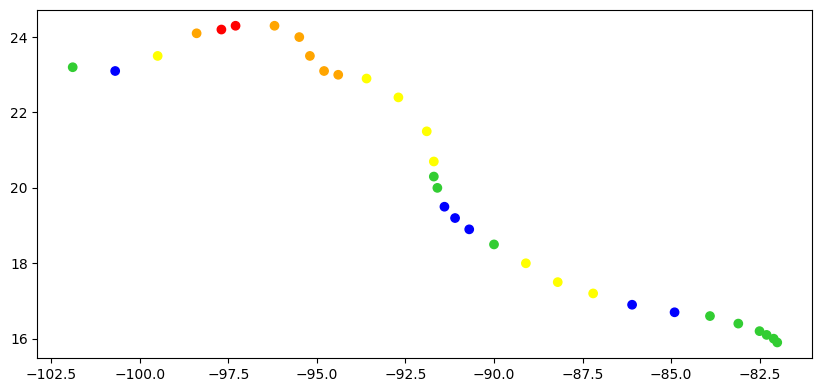

In [ ]:
colores = ['blue', 'limegreen', 'yellow', 'orange', 'red']   #para los colores especifícos
cmap = mcolors.ListedColormap(colores)  #cmap

gdf.plot(column='Peligrosidad', cmap=cmap,figsize=(10, 10)) #tamaño

# *Visualización del Mapa 2*:  La trayectoria de Alex a escala de circulación mayor o igual a 2

<Axes: >

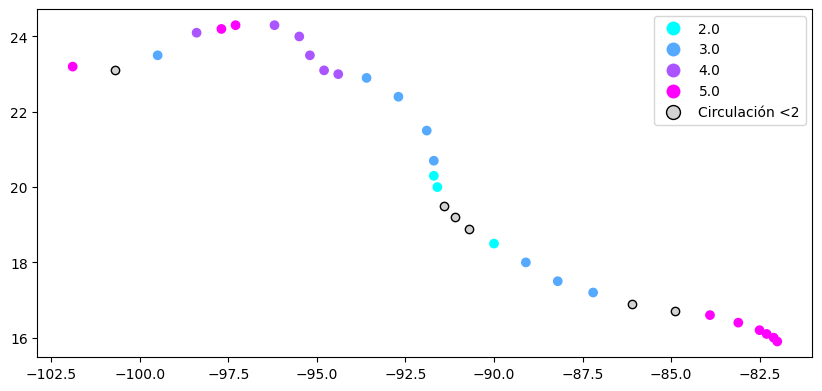

In [ ]:
gdf['circ_filtrada'] = df['Circulación'].apply(lambda state: state if state >= 2 else None)   #hace una nueva columna de valor faltante
gdf.plot(column='circ_filtrada', cmap='cool', legend= 'circ_filtrada', #graficar
                                categorical=True,
                                figsize=(10, 10),
                                missing_kwds={"color":"lightgray",
                                              "label":"Circulación <2",
                                             "edgecolor":"k"}
         )

In [ ]:
from google.colab import files   #subir archivo
uploaded = files.upload()

Saving dest22gw.zip to dest22gw (1).zip


In [ ]:
zipfile_name = list(uploaded.keys())[0]   #archivo zip

states = gpd.read_file(f"zip://{zipfile_name}") #leer el zip y bienvenida a geopadas



*   Visualización de los estados y sus coordenadas



CVEGEO                NOMGEO               NOM_ENT  CVE_CAP  \
0     01        Aguascalientes        Aguascalientes    10001   
1     02       Baja California       Baja California    20001   
2     03   Baja California Sur   Baja California Sur    30001   
3     04              Campeche              Campeche    20001   
4     05  Coahuila de Zaragoza  Coahuila de Zaragoza   300001   

                     NOM_CAP  COV_  COV_ID          AREA     PERIMETER  \
0             Aguascalientes     0       1  5.558674e+05  4.230060e+05   
1                   Mexicali     1       2  7.341220e+06  3.114718e+06   
2                     La Paz     2       3  7.277398e+06  4.086628e+06   
3  San Francisco de Campeche     3       4  5.726983e+06  1.566405e+06   
4                   Saltillo     4       5  1.506712e+07  2.414885e+06   

                                            geometry  \
0  POLYGON ((-101.86167 22.02888, -101.86167 22.0...   
1  MULTIPOLYGON (((-114.1288 28.01224, -114.12834...   
2  MULTIPOLYGON (((-109.91027 22.87937, -109.9102...   
3  MULTIPOLYGON (((-91.55142 18.28699, -91.55248 ...   
4  POLYGON ((-99.84322 27.76986, -99.85626 27.755...   

                     centroide  dist_filtrada    dist_punto  
0  POINT (-102.36194 22.00644)            NaN  8.010002e+05  
1   POINT (-115.0977 30.55373)            NaN  2.333607e+06  
2  POINT (-112.04647 25.91908)            NaN  1.858913e+06  
3   POINT (-90.31606 18.84857)            NaN  8.439889e+05  
4  POINT (-102.04406 27.29527)            NaN  8.358814e+05

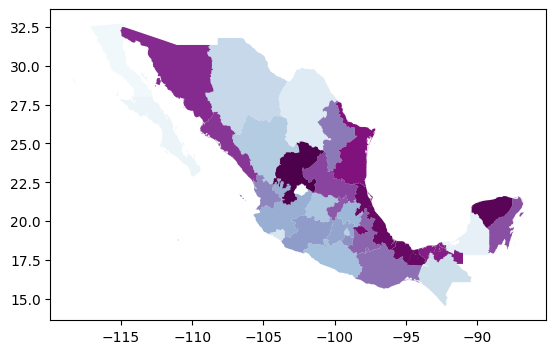

In [ ]:
states.plot(cmap='BuPu')    # la proyección ITRF2008 de México EPSG:6372
states.head()                #graficar y ver nuestros nuevos datos

cálculo del centroide de cada estado

<ipython-input-274-9354974eacd5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  states['centroide'] = states['geometry'].centroid


<Axes: >

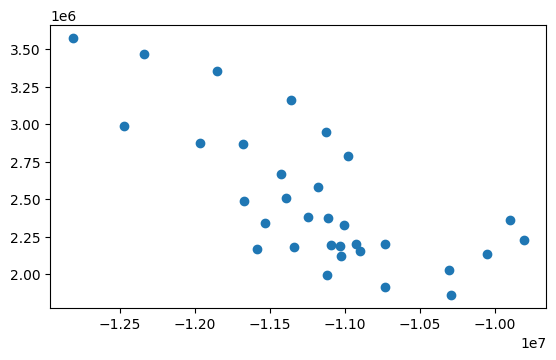

In [ ]:
states['centroide'] = states['geometry'].centroid    #vista de cada centroide
states_mercator = states.to_crs('EPSG:3857')    #proyeccion mercator
states_mercator['centroide'] = states_mercator['geometry'].centroid
states_mercator['centroide'].plot()



*   Visualización los centroides de cada estado y nuestro punto de interés



<Axes: >

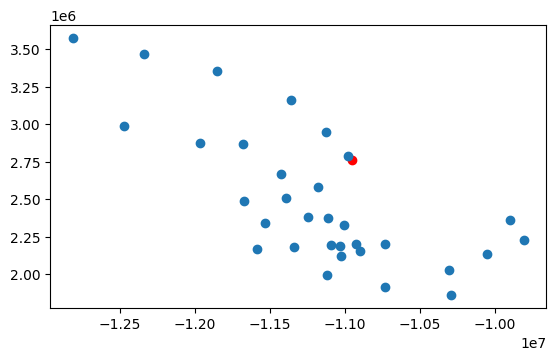

In [ ]:
p_referencia = Point(-98.4, 24.1) #coordenadas de un punto con intensidad 5 (-98.4, 24.1)
p_referencia_mercator = gpd.GeoSeries([p_referencia], crs='EPSG:4326').to_crs('EPSG:3857') #Reproyectar a mercator
p_referencia_mercator

#Graficando todo
ax = p_referencia_mercator.plot(color= 'red')  #Graficando el punto
states_mercator['centroide'].plot(ax=ax)   #los estados

In [ ]:
states_mercator['dist_punto'] = states_mercator['centroide'].distance(p_referencia_mercator[0])   #calcular la distancia de cada centroide al punto
states['dist_punto'] = states_mercator['dist_punto']  #del dato modificado al geodataframe

 Este para cuando solo se necesite la zona cercana sin la parte desdibujada


```
# states_mercator_filtrados = states_mercator[states_mercator['dist_punto'] < 750000]  

ax = states_mercator.plot(column='dist_filtrada',
                          cmap='YlOrRd',
                          legend=True,
                          figsize=(10, 8),
                          edgecolor='k',
                          linewidth= 0.5,
                          legend_kwds={'label': "Distancia al Ciclón", 'orientation': "horizontal"}
                         )
p_referencia_mercator.plot(ax=ax, color='red')
```

# *Visualización del Mapa 3*:  Un ciclón de intensidad alta y su cercanía a los estados

<Axes: >

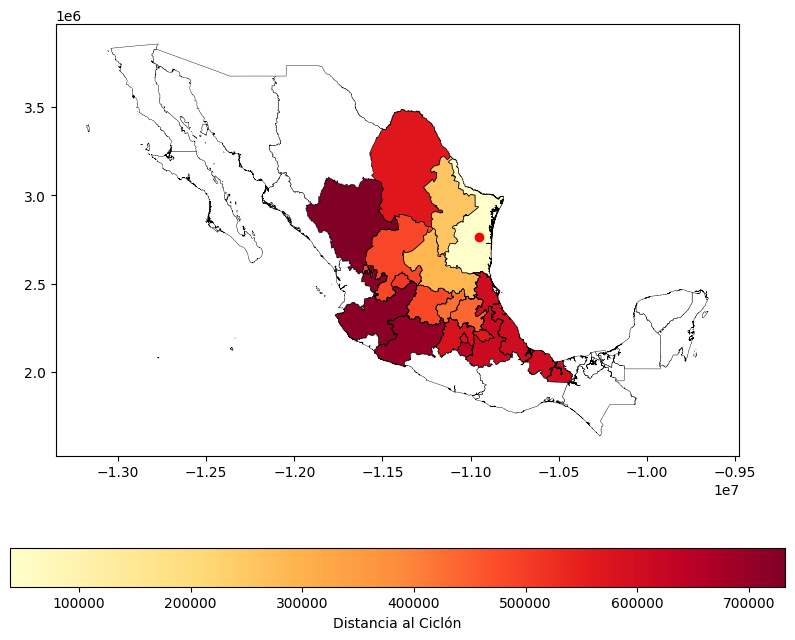

In [ ]:
states_mercator['dist_filtrada'] = states_mercator['dist_punto'].apply(lambda state: state if state < 750000 else np.nan)   #condicion: muestren distancias menores a 750km

ax = states_mercator.plot(column='dist_filtrada',   #grafica
                          cmap='YlOrRd',
                          legend=True,
                          figsize=(10, 8),
                          edgecolor='k',
                          linewidth= 0.5,
                          missing_kwds={"color": "white","edgecolor": "k","linewidth": 0.3},
                          legend_kwds={'label': "Distancia al Ciclón", 'orientation': "horizontal"}
                         )
p_referencia_mercator.plot(ax=ax, color='red')  #punto